# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [I Gusti Ngurah Gede Nararya Bhuana Kreshna]
- **Email:** [nararyabhuanaa@gmail.com]
- **ID Dicoding:** [nararyabhuana]

## Menentukan Pertanyaan Bisnis

- Musim apa yang paling ramai untuk penyewaan sepeda?
- Seberapa sering seorang pelanggan melakukan penyewaan sepeda dalam beberapa bulan terakhir?

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [3]:
day = pd.read_csv("data/day.csv")
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
hour = pd.read_csv("data/hour.csv")
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Saya mengumpulkan/mengimport semua data yang saya butuhka dari folder "data".

### Assessing Data

#### Menilai tabel `day`

In [5]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
print("Jumlah duplikasi : ", day.duplicated().sum())

Jumlah duplikasi :  0


In [7]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Menilai tabel `hour`

In [8]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
print("Jumlah duplikasi : ", hour.duplicated().sum())

Jumlah duplikasi :  0


In [10]:
hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**

Berikut kesalahan data yang saya dapatkan :
|           |        Tipe Data       | Missing Value | Duplicate Data | Inaccurate value |
| --------- | ---------------------- | ------------- | -------------- |:----------------:|
|    day    |   dteday != datetime   |               |                |                  |
|    hour   |   dteday != datetime   |               |                |                  |

### Cleaning Data

#### Membersihkan tabel `day`

In [11]:
day.dteday = pd.to_datetime(day.dteday)
day.dteday.info()

<class 'pandas.core.series.Series'>
RangeIndex: 731 entries, 0 to 730
Series name: dteday
Non-Null Count  Dtype         
--------------  -----         
731 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 5.8 KB


#### Membersihkan tabel `hour`

In [12]:
hour.dteday = pd.to_datetime(hour.dteday)
hour.dteday.info()

<class 'pandas.core.series.Series'>
RangeIndex: 17379 entries, 0 to 17378
Series name: dteday
Non-Null Count  Dtype         
--------------  -----         
17379 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 135.9 KB


**Insight:**
- Pada tahap ini, saya membersihkan data dari nilai-nilai yang hilang, duplikat, dan tidak sesuai. Langkah ini penting untuk memastikan kualitas data yang akan dianalisis lebih lanjut.

## Exploratory Data Analysis (EDA)

### Explore `day`

In [13]:
day.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [60]:
s = day.cnt.head()

In [15]:
day.groupby(by="dteday").agg({
    "cnt": "max",
    "casual": "max",
    "registered": "max",
    "temp": "max",
    "atemp": "max",
    "hum": "max",
    "windspeed": "max"
    
})

,cnt,casual,registered,temp,atemp,hum,windspeed
dteday,,,,,,,
2011-01-01,985,331,654,0.344167,0.363625,0.805833,0.160446
2011-01-02,801,131,670,0.363478,0.353739,0.696087,0.248539
2011-01-03,1349,120,1229,0.196364,0.189405,0.437273,0.248309
2011-01-04,1562,108,1454,0.200000,0.212122,0.590435,0.160296
2011-01-05,1600,82,1518,0.226957,0.229270,0.436957,0.186900
...,...,...,...,...,...,...,...
2012-12-27,2114,247,1867,0.254167,0.226642,0.652917,0.350133
2012-12-28,3095,644,2451,0.253333,0.255046,0.590000,0.155471
2012-12-29,1341,159,1182,0.253333,0.242400,0.752917,0.124383


In [16]:
day.groupby(by="season").dteday.nunique().sort_values(ascending=False)

season
3    188
2    184
1    181
4    178
Name: dteday, dtype: int64

In [17]:
day.groupby(by="weathersit").dteday.nunique().sort_values(ascending=False)

weathersit
1    463
2    247
3     21
Name: dteday, dtype: int64

In [18]:
musim1 = 0; musim2 = 0; musim3 = 0; musim4 = 0

for mm in day.loc[day["season"] == 1, "cnt"].tolist(): musim1 += mm
for mm in day.loc[day["season"] == 2, "cnt"].tolist(): musim2 += mm
for mm in day.loc[day["season"] == 3, "cnt"].tolist(): musim3 += mm
for mm in day.loc[day["season"] == 4, "cnt"].tolist(): musim4 += mm
musim = (musim1, musim2, musim3, musim4)

print(musim)

(471348, 918589, 1061129, 841613)


#### Explore `hour`

In [19]:
hour.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


<Axes: >

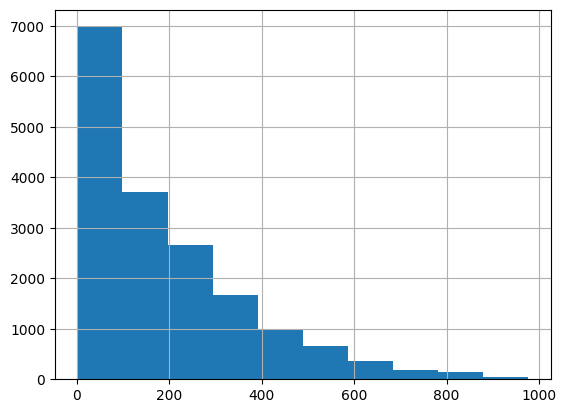

In [20]:
hour.cnt.hist()

In [21]:
hour.groupby(by="dteday").agg({
    "cnt": "max",
    "casual": "max",
    "registered": "max",
    "temp": "max",
    "atemp": "max",
    "hum": "max",
    "windspeed": "max"
    
})

,cnt,casual,registered,temp,atemp,hum,windspeed
dteday,,,,,,,
2011-01-01,110,47,71,0.46,0.4545,0.94,0.2985
2011-01-02,93,20,73,0.46,0.4545,1.00,0.4478
2011-01-03,157,14,153,0.26,0.2576,0.69,0.4179
2011-01-04,212,18,202,0.30,0.2879,0.74,0.3284
2011-01-05,195,12,192,0.30,0.3182,0.74,0.3284
...,...,...,...,...,...,...,...
2012-12-27,257,31,227,0.30,0.2727,0.93,0.5224
2012-12-28,271,84,238,0.30,0.3182,0.70,0.2836
2012-12-29,147,22,125,0.30,0.2424,1.00,0.5522


In [22]:
hour.groupby(by="season").dteday.nunique().sort_values(ascending=False)

season
3    188
2    184
1    181
4    178
Name: dteday, dtype: int64

In [23]:
hour.groupby(by="weathersit").dteday.nunique().sort_values(ascending=False)

weathersit
1    700
2    567
3    300
4      3
Name: dteday, dtype: int64

In [24]:
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Saya mengexplor data yang saya perlukan untuk menjawab beberapa pertanyaan bisnis dan juga saya mengulik lebih dalam supaya bisa mendapat insight yang lebih banyak.

## Visualization & Explanatory Analysis

#### Clustering

In [71]:
manual_grouping = {}

for _, row in day.iterrows():
    wikwik = row["weekday"]
    count = row["cnt"]

    if wikwik not in manual_grouping:
        manual_grouping[wikwik] = 0
    manual_grouping[wikwik] += count

weekday_map = {
    0: "Minggu",
    1: "Senin",
    2: "Selasa",
    3: "Rabu",
    4: "Kamis",
    5: "Jumat",
    6: "Sabtu"
}

# Cetak hasil
print("Hasil manual grouping per weekday:")
for wikwik, total in manual_grouping.items():
    print(f"{weekday_map[wikwik]} ({wikwik}): {total}")

Hasil manual grouping per weekday:
Sabtu (6): 477807
Minggu (0): 444027
Senin (1): 455503
Selasa (2): 469109
Rabu (3): 473048
Kamis (4): 485395
Jumat (5): 487790


### Pertanyaan 1: Musim apa yang paling ramai peminat untuk penyewaan sepeda? 

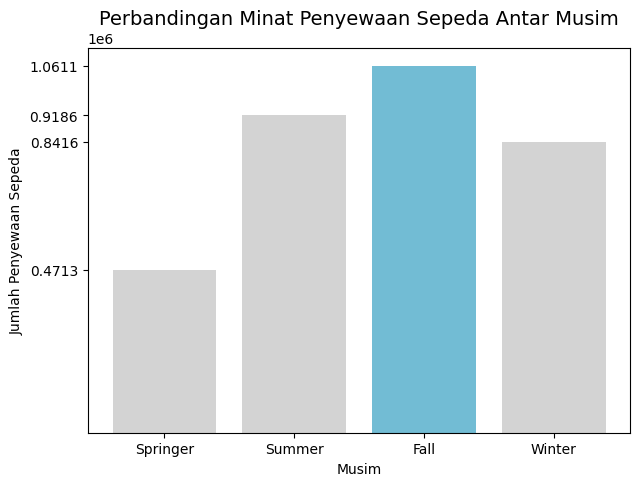

In [26]:
musim_name = ('Springer', 'Summer', 'Fall', 'Winter')
musim_data = {
    musim_name[0]: musim[0],
    musim_name[1]: musim[1],
    musim_name[2]: musim[2],
    musim_name[3]: musim[3]
}

highlight = "Fall"
colors = ["#D3D3D3" if musimwarna != highlight else "#72BCD4" for musimwarna in musim_data.keys()]

plt.figure(figsize=(7,5))
plt.bar(musim_data.keys(), musim_data.values(), color=colors)

plt.yticks(list(musim_data.values()))
plt.title("Perbandingan Minat Penyewaan Sepeda Antar Musim", fontsize=14)
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.xlabel("Musim")

plt.show()

### Pertanyaan 2: Seberapa sering seorang pelanggan melakukan penyewaan sepeda dalam beberapa bulan terakhir?

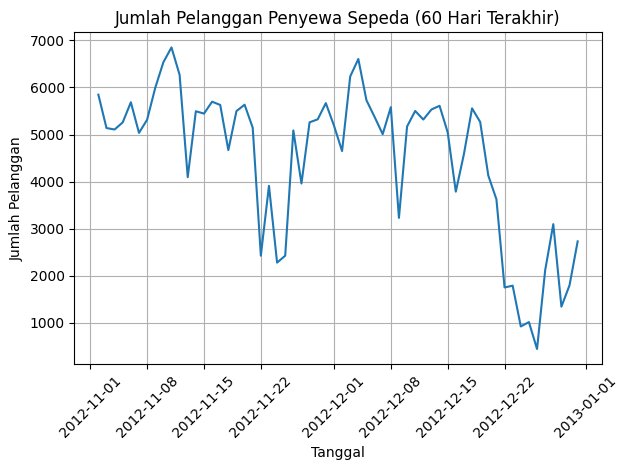

In [72]:
day_last_60 = day.sort_values('dteday').tail(60)

sns.lineplot(data=day_last_60, x='dteday', y='cnt')
plt.title("Jumlah Pelanggan Penyewa Sepeda (60 Hari Terakhir)")
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Pelanggan")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

## Conclusion

- Conclution pertanyaan 1 : Berdasarkan visualisasi data tersebut, dapat diketahui bahwa pelanggan kita paling ramai peminat untuk menyewa sepeda terjadi pada musim fall atau musim gugur. Musim gugur adalah musim yang pas untuk bersepeda, jalannya tidak tertutup oleh salju seperti musim dingin dan panasnya tidak sepanas musim summer yang menyebabkan ramai pelanggan menyewa sepeda pada musim ini. Namun tidak menutup kemungkinan pelanggan menyewa sepeda pada musim lain. Data yang telah saya jadikan memperlihatan perbedaan jumlah pelanggan yang menyewa antara musim semi, musim panas, musim dingin dan musim gugur. Perbedaan pelanggan musim gugur dengan musim dingin dan musim panas tidak terpantau jauh, namun perbedaan dengan musim semi, bisa dikatakan lumayah jauh. Musim semi diangka 471.348 pelanggan sedangkan musim gugur diangka 1.061.129 pelanggan. Penyebab kemungkinan terjadinya hal seperti ini adalah :
1. Cuaca masih labil – di awal musim semi, suhu masih dingin sisa musim dingin dan sering turun hujan, jadi orang cenderung kurang nyaman bersepeda.
2. Belum musim liburan – banyak orang lebih aktif bersepeda saat musim panas atau gugur, karena waktu liburan, sekolah libur, atau kegiatan luar ruangan lebih ramai.
3. Kondisi jalan – setelah musim dingin, jalan kadang masih basah, licin, atau kotor karena salju yang baru mencair, sehingga kurang menarik untuk bersepeda.
- Conclution pertanyaan 2 : Berdasarkan visualisasi data tersebut, dapat diketahui seringnya pelanggan melakukan penyewaan sepeda dalam beberapa bulan terakhir mengalami penurunan. Dari analisis saya pada pertanyaan sebelumnya, kemungkinan ini terjadi karena pada tanggan tersebut akan masuk musim dingin. Dimana kondisi cuaca dan jalan yang tidak memadai untuk bersepeda yang menyebabkan penurunan penyewaan sepeda.